1. Считать данные из файла и вывести последние 20 его строк (метод tail()). 
2. Проверить наличие пропусков в файле. Если пропуски найдены, то заменить их на среднее значение во всех числовых столбцах. 
3. Вычислить количество мужчин и женщин старше 20 лет. И для каждого пола определить суммарный доход (столбец Annual Income). 
4. Оценить корреляцию Пирсона для столбцов Age и Genre (преобразовать данные столбца Genre в числовые значения). 
5. Сохранить в новый файл (output.csv) данные по покупателям, у которых доход (Annual Income) >100. 
6. Для данных о покупателях построить диаграмму рассеивания зависимости расходов от возраста. 
7. Построить столбчатую диаграмму по распределению возрастов (по интервалу 10 лет). 


In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Считать данные из файла и вывести последние 20 его строк (метод tail()).

In [110]:
data = pd.read_csv(r"C:\Users\Admin/OneDrive/Рабочий стол/СМП/Mall_Customers_1.csv")
data.tail(20)

,CustomerID,Genre,Age,AnnualIncome,Spending Score (1-100)
180,181,Female,37.0,97.0,32.0
181,182,Female,32.0,97.0,86.0
182,183,Male,46.0,98.0,15.0
183,184,Female,29.0,98.0,88.0
184,185,Female,41.0,99.0,39.0
185,186,Male,30.0,99.0,97.0
186,187,Female,54.0,101.0,24.0
187,188,Male,28.0,101.0,68.0
188,189,Female,41.0,103.0,17.0
189,190,Female,36.0,103.0,85.0


### Проверить наличие пропусков в файле. Если пропуски найдены, то заменить их на среднее значение во всех числовых столбцах.

In [52]:
data.isnull().sum()

CustomerID                0
Genre                     0
Age                       5
AnnualIncome              4
Spending Score (1-100)    3
dtype: int64

In [53]:
data['Age'] = data['Age'].fillna(data.Age.median())
data['AnnualIncome'] = data['AnnualIncome'].fillna(data.Age.median())
data['Spending Score (1-100)'] = data['Spending Score (1-100)'].fillna(data.Age.median())
data.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
AnnualIncome              0
Spending Score (1-100)    0
dtype: int64

### Вычислить количество мужчин и женщин старше 20 лет. И для каждого пола определить суммарный доход (столбец Annual Income).

In [54]:
number_of_women = data.query('Genre == "Female" and Age > 20.0').count()[0]
print('Количество женщин:', number_of_women)
number_of_men = data.query('Genre == "Male" and Age > 20.0').count()[0]
print('Количество мужчин:', number_of_men)
data.query('Age > 20.0').groupby('Genre', as_index = False).agg({'AnnualIncome':'sum'})

Количество женщин: 108
Количество мужчин: 77


,Genre,AnnualIncome
0,Female,6424.0
1,Male,4711.0


### Оценить корреляцию Пирсона для столбцов Age и Genre (преобразовать данные столбца Genre в числовые значения).

In [60]:
data['Genre'] = data['Genre'].replace(['Male', 'Female'],[1,0])
correlation = data['Age'].corr(data['Genre'])
print('Корреляция Пирсона равна', correlation)

Корреляция Пирсона равна 0.06336682559187526


### Сохранить в новый файл (output.csv) данные по покупателям, у которых доход (Annual Income) >100.

In [64]:
new_data = data.query('AnnualIncome > 100')
new_data.to_csv('output.csv')
output_data = pd.read_csv(r"C:\Users\Admin/OneDrive/Рабочий стол/СМП/output.csv")
output_data

,Unnamed: 0,CustomerID,Genre,Age,AnnualIncome,Spending Score (1-100)
0,186,187,0,54.0,101.0,24.0
1,187,188,1,28.0,101.0,68.0
2,188,189,0,41.0,103.0,17.0
3,189,190,0,36.0,103.0,85.0
4,190,191,0,34.0,103.0,23.0
5,191,192,0,36.0,103.0,69.0
6,193,194,0,38.0,113.0,36.0
7,194,195,0,47.0,120.0,16.0
8,195,196,0,35.0,120.0,79.0
9,196,197,0,45.0,126.0,28.0


### Для данных о покупателях построить диаграмму рассеивания зависимости расходов от возраста.

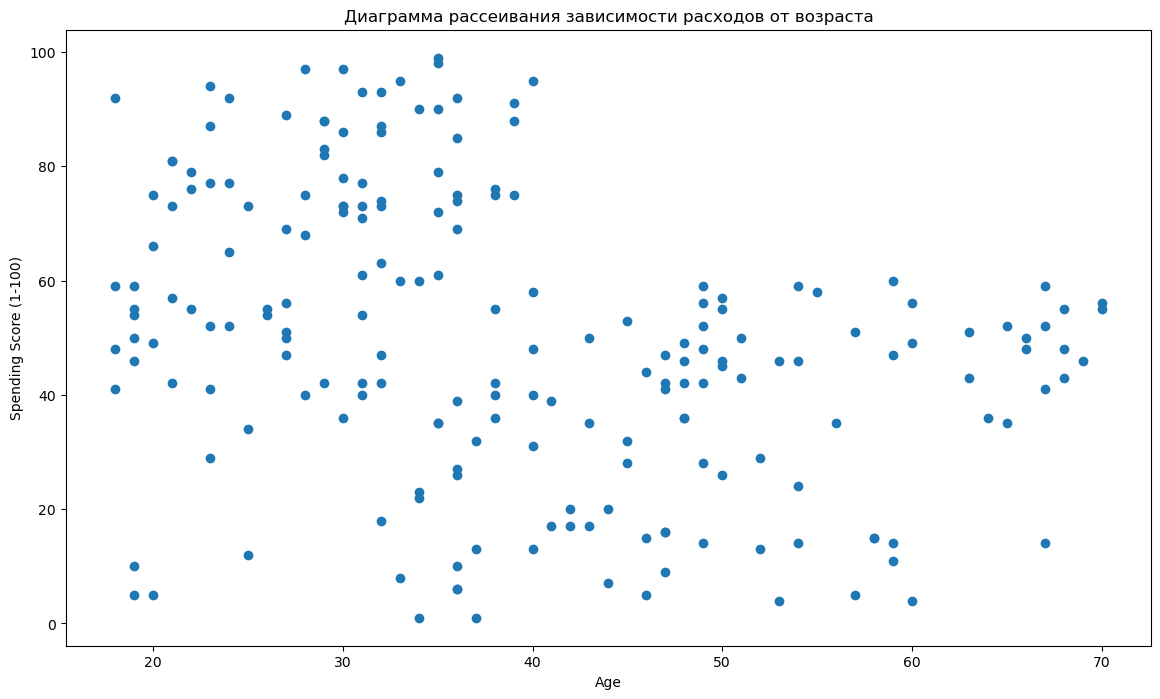

In [70]:
plt.figure(figsize=(14, 8))
plt.scatter(data['Age'], data['Spending Score (1-100)'])
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.title('Диаграмма рассеивания зависимости расходов от возраста')
plt.show()

### Построить столбчатую диаграмму по распределению возрастов (по интервалу 10 лет).

In [111]:
max_age = data['Age'].max()
max_age = int(max_age)
max_age

70

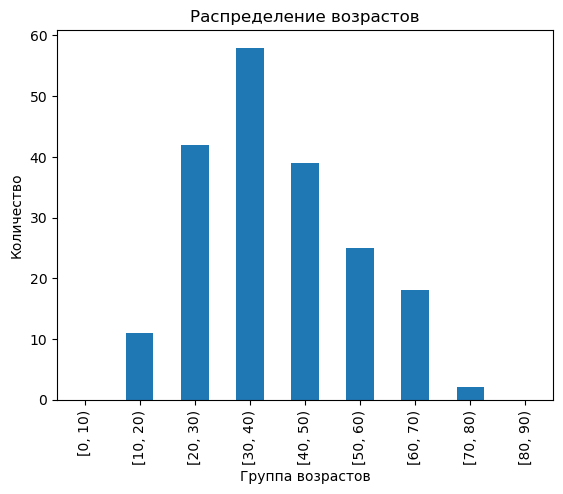

In [115]:
age_groups = pd.cut(data['Age'], bins=range(0, 100, 10), right=False)
age_distribution = age_groups.value_counts().sort_index()
age_distribution.plot(kind='bar')
plt.xlabel('Группа возрастов')
plt.ylabel('Количество')
plt.title('Распределение возрастов')
plt.show()